In [1]:
import numpy as np
import pandas as pd

In [68]:
# 导入数据
cmf = pd.read_excel('/Users/cyano/Desktop/IOCCG-FUI/CMF.xlsx')
ioccg = pd.read_excel('/Users/cyano/Desktop/IOCCG-FUI/IOCCG.xlsx')

In [69]:
# dataframe 转换为numpy数组
cmfu = cmf.to_numpy()
ioc = ioccg.to_numpy()

In [70]:
print(cmfu.shape)
print(ioc.shape)

(39, 4)
(39, 500)


In [71]:
# wave 是波长
wave = cmfu[:,0]
# cx 是x的光谱响应函数
cx = cmfu[:,1]
cy = cmfu[:,2]
cz = cmfu[:,3]
cz

array([6.78500e-02, 2.07400e-01, 6.45600e-01, 1.38560e+00, 1.74706e+00,
       1.77211e+00, 1.66920e+00, 1.28764e+00, 8.12950e-01, 4.65180e-01,
       2.72000e-01, 1.58200e-01, 7.82500e-02, 4.21600e-02, 2.03000e-02,
       8.75000e-03, 3.90000e-03, 2.10000e-03, 1.65000e-03, 1.10000e-03,
       8.00000e-04, 3.40000e-04, 1.90000e-04, 5.00000e-05, 2.00000e-05,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])

In [72]:
ioccg.head(5)

,IO1,IO2,IO3,IO4,IO5,IO6,IO7,IO8,IO9,IO10,...,IO491,IO492,IO493,IO494,IO495,IO496,IO497,IO498,IO499,IO500
0,0.015763,0.009568,0.011929,0.012547,0.013225,0.012482,0.012780,0.010928,0.011266,0.012740,...,0.000580,0.000561,0.000593,0.003004,0.000971,0.001012,0.001044,0.001263,0.002709,0.002060
1,0.016610,0.010074,0.012356,0.013503,0.013914,0.013399,0.013701,0.011291,0.011980,0.013464,...,0.000619,0.000629,0.000672,0.003142,0.001072,0.001183,0.001168,0.001342,0.002974,0.002308
2,0.015826,0.009841,0.011951,0.013562,0.013326,0.013222,0.013545,0.010840,0.011830,0.013283,...,0.000665,0.000706,0.000760,0.003296,0.001176,0.001382,0.001309,0.001430,0.003267,0.002586
3,0.014521,0.009403,0.011276,0.013268,0.012498,0.012566,0.012929,0.010125,0.011327,0.012755,...,0.000712,0.000792,0.000867,0.003501,0.001290,0.001604,0.001455,0.001511,0.003572,0.002850
4,0.012722,0.008572,0.010238,0.012384,0.011016,0.011373,0.011604,0.008913,0.010410,0.011821,...,0.000776,0.000892,0.000994,0.003809,0.001427,0.001869,0.001629,0.001619,0.003935,0.003177


In [73]:
# fx,fy,fz 分别是颜色响应函数 cx,cy,cz 与ioccg-Rrs的乘积
fx = np.zeros(shape = (39,500))
fy = np.zeros(shape = (39,500))
fz = np.zeros(shape = (39,500))
i = 0
while i <= 499:
    fx[:,i] = cx*ioc[:,i]
    fy[:,i] = cy*ioc[:,i]
    fz[:,i] = cz*ioc[:,i]
    i += 1

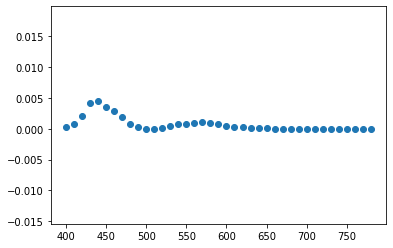

In [74]:
import matplotlib.pyplot as plt
fx1 = fx[:,0]
plt.scatter(wave,fx1)
plt.show()

In [75]:
fx.shape

(39, 500)

In [76]:
# hx,hy,hz 为cx*Rrs 的积分结果，是 CIE-XYZ 系统中的 XYZ
# 以下过程将 积分结果 分别储存在一个（1，500）的ndarray中
hx = np.zeros(shape = (1,500))
hy = np.zeros(shape = (1,500))
hz = np.zeros(shape = (1,500))
i = 0
while i <= 499:
    hx[0,i] = np.trapz(fx[:,i],x = wave)
    hy[0,i] = np.trapz(fy[:,i],x = wave)
    hz[0,i] = np.trapz(fz[:,i],x = wave)
    i += 1

In [78]:
# 积分结果为 CIE-XYZ 系统中的 XYZ,需要将至归一化为 xyz
x = hx/(hx + hy + hz) 
y = hy/(hx + hy + hz)
z = hz/(hx + hy + hz)
x[0,0]

0.1679490458023463

In [108]:
# xyz 转化为色度角 angle
import math
hue_band = np.zeros(shape = (1,500))
angle = np.zeros(shape = (1,500))
i = 0
while i <= 499:
    hue_band[0,i] = math.atan2((y[0,i] - 1/3),(x[0,i] - 1/3))
    i += 1
hue_angle = np.where(hue_band > 0,hue_band,hue_band + math.pi*2)
j = 0
while j <= 499:
    angle[0,j] = math.degrees(hue_angle[0,j])
    j += 1


## 色度角转换为FUI并导出到excel

In [172]:
# hue_tran 为 FUI 查找表，根据 hue_tran 将 FUI 分为21个等级
# 转换 angle 为 series
angle1 = angle.reshape(500,)
list_angle = pd.Series(angle1)
fui = []
fui_level = list(range(1,22))
angle_tran = [232.0, 220.977, 209.994, 190.779, 163.084, 132.999,
            109.054, 94.037, 83.346, 74.572, 67.957, 62.186, 56.435,
            50.665, 45.129, 39.769, 34.906, 30.439, 26.337, 22.741, 19.0]
for t in list_angle:
    i = 0
    while t < angle_tran[i]:
        i += 1
    fui.append(i+1)
FUI = pd.Series(fui)
FUI.to_excel('/Users/cyano/Desktop/IOCCG-FUI/ioccg-fui.xlsx')